In [1]:
# Make inline plots vector graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

# Plotting setup
import matplotlib.pyplot as plt
import datetime

# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from country_list import countries_for_language
import tslearn
from tslearn.clustering import TimeSeriesKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os
from tslearn.utils import to_time_series_dataset
from math import ceil, prod
import folium

# from iso3166 import countries
os.chdir(r'D:\德国留学\课\Data literacy\finial project\Data')

In [2]:
not_country_2 = ['World',
 'Africa',
 'Asia',
 'Europe',
 'European Union',
 'High income',
#  'International',
 'Lower middle income',
 'North America',
 'Oceania',
 'South America',
#  'Summer Olympics 2020',
 'Upper middle income']

continent = [
 'Africa',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America',
]

In [3]:
not_country = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 'High income', 'International', 
               'Lower middle income', 'North America', 'Oceania', 'South America', 'Summer Olympics 2020', 
               'Upper middle income']

Analysis for totoal death data

In [4]:
total_deaths_per_million = pd.read_csv('total_deaths_per_million.csv',index_col=0)

In [13]:
total_deaths_per_million = total_deaths_per_million.drop(columns = not_country)
total_deaths_per_million = total_deaths_per_million.fillna(0)
total_deaths_per_million.index = pd.to_datetime(total_deaths_per_million.index)

In [6]:
num_cluster = 10
total_deaths_clusters = TimeSeriesKMeans(n_clusters=num_cluster, metric="dtw", max_iter=5,
                           max_iter_barycenter=5,
                           random_state=0).fit_predict(total_deaths_per_million.T)

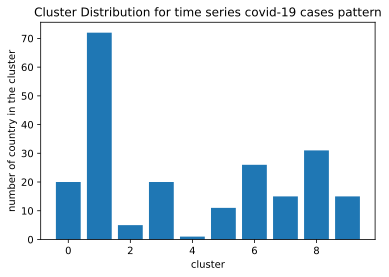

In [15]:
fancy_names_for_labels = total_deaths_per_million.columns
total_deaths_cluster_dist = pd.DataFrame(zip(fancy_names_for_labels, total_deaths_clusters)
             ,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
# Cluster Distribution
cluster_index = [i[0] for i in list(total_deaths_cluster_dist.value_counts().index)]
cluster_value = total_deaths_cluster_dist.value_counts().values
plt.title("Cluster Distribution for time series covid-19 cases pattern")
plt.bar(cluster_index,cluster_value)
plt.xlabel('cluster')
plt.ylabel('number of country in the cluster')
plt.show()

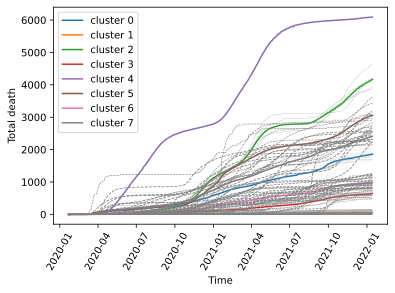

In [16]:
for i in range(8):
    avg = total_deaths_per_million[list(total_deaths_cluster_dist[total_deaths_cluster_dist['Cluster']==i].index)].mean(axis=1)
    plt.plot(avg.index,avg.values,label = 'cluster {}'.format(i))
    for ai in total_deaths_per_million[list(total_deaths_cluster_dist[total_deaths_cluster_dist['Cluster']
                                                                   ==i].index)].columns:
        plt.plot(total_deaths_per_million[ai].index,total_deaths_per_million[ai].values,
                 color='Grey',linewidth=0.1*(i+1),linestyle='--')
# for c in continent:
#     plt.plot(avg.index,total_deaths_per_million[c],label = c)
plt.xticks(rotation=60)
plt.xlabel('Time')
plt.ylabel('Total death')
plt.legend()
plt.show()

In [ ]:
# assign meaning tod the clusters: severity level of the epidemic trend

In [17]:
# rearange the order of cluster
total_deaths_cluster_dist = total_deaths_cluster_dist.replace([0,1,2,3,4,5,6,7],[0,3,6,1,7,5,2,4])
total_deaths_cluster_dist.Cluster = pd.to_numeric(total_deaths_cluster_dist.Cluster, downcast='float')

data_for_map = total_deaths_cluster_dist.reset_index().replace(['United States','Czechia','Serbia'], 
                                                              ["United States of America",'Czech Republic','Republic of Serbia'])

In [18]:
# Setup a folium map at a high-level zoom
url3 = 'world-countries.json'
map = folium.Map( zoom_start=1.5) #location=[100, 0],

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data=url3, data=data_for_map,
             columns=['Series', 'Cluster'],
             key_on='feature.properties.name',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.8,
               nan_fill_color='White',
#              legend_name=hist_indicator
              )

E:\anaconda\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [19]:
map

We can classify countries according to the severity level of the epidemic trend

In [7]:
total_deaths_per_million = pd.read_csv('total_deaths_per_million.csv',index_col=0)
total_deaths_per_million_continent = total_deaths_per_million[continent]
total_deaths_per_million_continent = total_deaths_per_million_continent.fillna(0)
total_deaths_per_million_continent.index = pd.to_datetime(total_deaths_per_million_continent.index)

In [8]:
num_cluster = 3
total_cases_continent_clusters = TimeSeriesKMeans(n_clusters=num_cluster, metric="dtw", max_iter=5,
                           max_iter_barycenter=5,
                           random_state=0).fit_predict(total_deaths_per_million_continent.T)

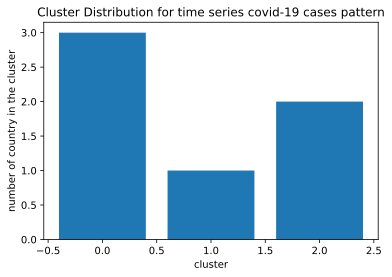

In [18]:
fancy_names_for_labels = total_deaths_per_million_continent.columns
cluster_dist = pd.DataFrame(zip(fancy_names_for_labels, total_cases_continent_clusters)
             ,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
# Cluster Distribution
cluster_index = [i[0] for i in list(cluster_dist.value_counts().index)]
cluster_value = cluster_dist.value_counts().values
plt.title("Cluster Distribution for time series covid-19 cases pattern")
plt.bar(cluster_index,cluster_value)
plt.xlabel('cluster')
plt.ylabel('number of country in the cluster')
plt.show()

In [19]:
cluster_dist

,Cluster
Series,
Africa,0
Asia,0
Oceania,0
South America,1
Europe,2
North America,2


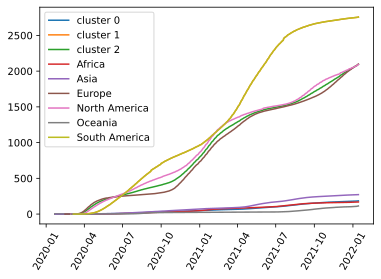

In [20]:
for i in range(num_cluster):
    avg = total_deaths_per_million_continent[list(cluster_dist[cluster_dist['Cluster']==i].index)].mean(axis=1)
    plt.plot(avg.index,avg.values,label = 'cluster {}'.format(i))
for c in continent:
    plt.plot(avg.index,total_deaths_per_million[c],label = c)
plt.xticks(rotation=60)
plt.legend()
plt.show()
# cluster 2 = South America

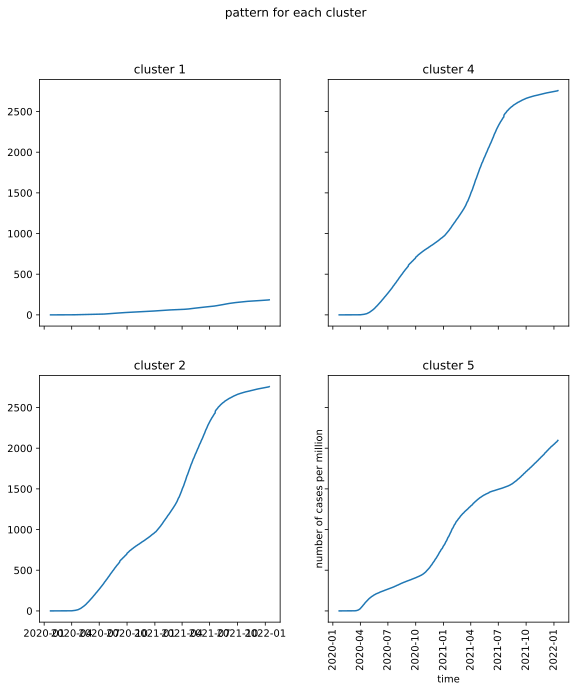

In [21]:
n_col = 2
n_row = int(num_cluster/n_col)+1
f, axis = plt.subplots(n_row, n_col, sharex='col',sharey='row', figsize=(9.5, 10))
for col in range(n_col):
    for row in range(n_row):
# for i in range(num_cluster):
        avg = total_deaths_per_million_continent[list(cluster_dist[cluster_dist['Cluster']==row+col].index)].mean(axis=1)
    #     axs[i] = plt.subplot(3,2,i+1,sharex=True)
        axis[row,col].plot(avg.index,avg.values)
        plt.xticks(rotation=90)
        axis[row,col].set_title('cluster {}'.format(row+col*3+1))
    #     plt.plot(avg.index,avg.values)
plt.xlabel('time')
plt.ylabel('number of cases per million')
f.suptitle('pattern for each cluster')
plt.show()

# not enough to show information, especially when their y axis is not the same (which can be solved by
# sharing y axis or plot them all together)

Analysis for weekly_cases_per_million

In [20]:
weekly_cases_per_million = pd.read_csv('weekly_cases_per_million.csv',index_col=0)
weekly_cases_per_million = weekly_cases_per_million.drop(columns = not_country)
weekly_cases_per_million = weekly_cases_per_million.fillna(0)
weekly_cases_per_million.index = pd.to_datetime(weekly_cases_per_million.index)

In [124]:
weekly_cases_per_million.iloc[-45:,:]

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,8.209,834.339,28.241,12927.580,3.035,3438.017,30.387,279.833,1105.747,1175.428,...,439.005,43.258,0.00,0.0,199.095,986.179,0.0,1.115,5.074,105.353
2021-12-02,6.100,816.935,29.070,14116.917,3.035,5289.256,0.000,289.064,1094.292,1203.414,...,458.804,42.964,0.00,0.0,165.651,998.891,0.0,0.951,5.708,172.606
2021-12-03,6.050,805.100,29.025,16779.998,2.741,5289.256,50.644,299.370,1001.305,1147.442,...,474.011,44.555,0.00,0.0,149.800,1012.979,0.0,1.345,7.611,238.866
2021-12-04,6.050,788.393,29.518,16779.998,3.094,5289.256,60.773,303.075,968.287,1119.455,...,470.568,44.378,0.00,0.0,142.380,991.903,0.0,1.312,8.245,310.558
2021-12-05,5.924,757.066,29.518,16779.998,3.389,5289.256,60.773,311.978,940.660,1175.428,...,452.491,44.260,0.00,0.0,147.083,1005.940,0.0,1.246,8.932,337.592
2021-12-06,6.000,749.060,29.541,24808.025,3.065,5487.603,70.902,323.139,908.990,1072.811,...,458.804,43.936,0.00,0.0,126.180,1014.304,0.0,1.279,9.355,319.371
2021-12-07,5.498,817.979,29.765,21976.885,3.919,5487.603,70.902,339.737,855.758,1212.743,...,472.002,44.054,0.00,0.0,145.097,1012.959,0.0,1.279,10.835,462.226
2021-12-08,4.594,859.052,29.675,17956.408,4.391,5487.603,101.288,339.737,824.762,1240.730,...,480.323,43.612,0.00,0.0,115.346,1013.886,0.0,1.345,12.737,1013.174
2021-12-09,4.970,774.122,29.204,20865.114,4.067,3636.364,101.288,341.119,737.839,1296.702,...,465.403,43.170,0.00,0.0,118.237,1030.317,0.0,1.345,18.075,1287.953


In [38]:
# truncated
weekly_cases_per_million2 = weekly_cases_per_million.iloc[-45:,:]

In [64]:
num_cluster = 4
weekly_cases_clusters = TimeSeriesKMeans(n_clusters=num_cluster, metric="dtw", max_iter=5,
                           max_iter_barycenter=5,
                           random_state=0).fit_predict(weekly_cases_per_million2.T)

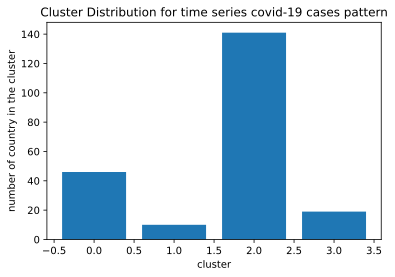

In [65]:
# Cluster Mapping
fancy_names_for_labels = weekly_cases_per_million2.columns
weekly_cases_clusters_dist = pd.DataFrame(zip(fancy_names_for_labels, weekly_cases_clusters)   
             ,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
# Cluster Distribution
cluster_index = [i[0] for i in list(weekly_cases_clusters_dist.value_counts().index)]
cluster_value = weekly_cases_clusters_dist.value_counts().values
plt.title("Cluster Distribution for time series covid-19 cases pattern")
plt.bar(cluster_index,cluster_value)
plt.xlabel('cluster')
plt.ylabel('number of country in the cluster')
plt.show()

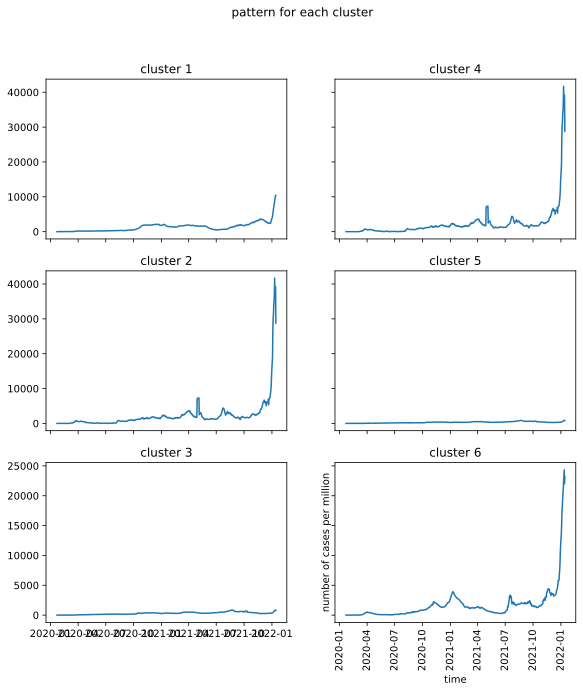

In [24]:
n_col = 2
n_row = int(num_cluster/n_col)+1
f, axis = plt.subplots(n_row, n_col, sharex='col',sharey='row', figsize=(9.5, 10))
for col in range(n_col):
    for row in range(n_row):
        avg = weekly_cases_per_million[list(weekly_cases_clusters_dist[weekly_cases_clusters_dist['Cluster']
                                                                       ==row+col].index)].mean(axis=1)
        axis[row,col].plot(avg.index,avg.values)
        plt.xticks(rotation=90)
        axis[row,col].set_title('cluster {}'.format(row+col*3+1))
plt.xlabel('time')
plt.ylabel('number of cases per million')
f.suptitle('pattern for each cluster')
plt.show()

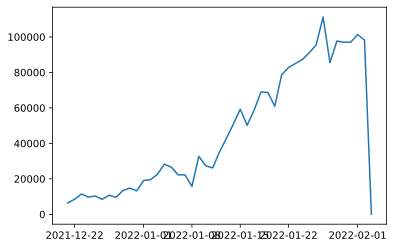

In [179]:
for ai in weekly_cases_per_million2[list(weekly_cases_clusters_dist[weekly_cases_clusters_dist['Cluster']
                                                                   ==3].index)].columns:
    plt.plot(weekly_cases_per_million2[ai].index,weekly_cases_per_million2[ai].values)

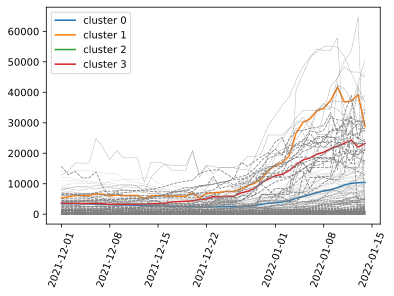

In [26]:
for i in range(4):
    avg = weekly_cases_per_million2[list(weekly_cases_clusters_dist[weekly_cases_clusters_dist['Cluster']
                                                                   ==i].index)].mean(axis=1)
    plt.plot(avg.index,avg.values,label='cluster {}'.format(i))
    for ai in weekly_cases_per_million2[list(weekly_cases_clusters_dist[weekly_cases_clusters_dist['Cluster']
                                                                   ==i].index)].columns:
        plt.plot(weekly_cases_per_million2[ai].index,weekly_cases_per_million2[ai].values,
                color='Grey',linewidth=0.2*(i+1),linestyle='--')
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [66]:
#  rearange the order of clusters, and try to assign some meaning to these clusters
weekly_cases_clusters_dist = weekly_cases_clusters_dist.replace([0,1,2],[1,0,2])

# weekly_cases_clusters_dist.Cluster = pd.to_numeric(weekly_cases_clusters_dist.Cluster, downcast='float')

data_for_map = weekly_cases_clusters_dist.reset_index().replace(['United States','Czechia','Serbia'], 
                                                              ["United States of America",'Czech Republic','Republic of Serbia'])

In [67]:
# Setup a folium map at a high-level zoom
url3 = 'world-countries.json'
map = folium.Map( zoom_start=1.5) #location=[100, 0],

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data=url3, data=data_for_map,
             columns=['Series', 'Cluster'],
             key_on='feature.properties.name',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.8,
               nan_fill_color='White',
               bins=3,
#              legend_name=hist_indicator
              )

E:\anaconda\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [68]:
map

analysis over continents

In [27]:
weekly_cases_per_million = pd.read_csv('weekly_cases_per_million.csv',index_col=0)
weekly_cases_per_million_continent = weekly_cases_per_million[continent]
weekly_cases_per_million_continent = weekly_cases_per_million_continent.fillna(0)
weekly_cases_per_million_continent.index = pd.to_datetime(weekly_cases_per_million_continent.index)
num_cluster = 3
weekly_cases_continent_clusters = TimeSeriesKMeans(n_clusters=num_cluster, metric="dtw", max_iter=5,
                           max_iter_barycenter=5,
                           random_state=0).fit_predict(weekly_cases_per_million_continent.T)

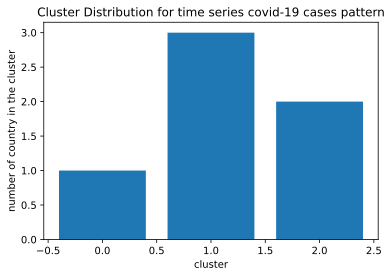

In [28]:
fancy_names_for_labels = weekly_cases_per_million_continent.columns
cluster_dist = pd.DataFrame(zip(fancy_names_for_labels, weekly_cases_continent_clusters)
             ,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
# Cluster Distribution
cluster_index = [i[0] for i in list(cluster_dist.value_counts().index)]
cluster_value = cluster_dist.value_counts().values
plt.title("Cluster Distribution for time series covid-19 cases pattern")
plt.bar(cluster_index,cluster_value)
plt.xlabel('cluster')
plt.ylabel('number of country in the cluster')
plt.show()

In [29]:
cluster_dist

,Cluster
Series,
Oceania,0
Africa,1
Asia,1
South America,1
Europe,2
North America,2


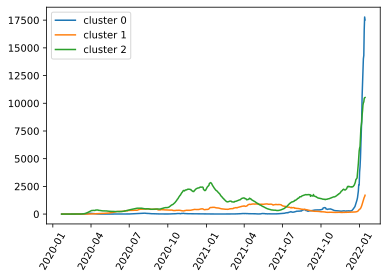

In [30]:
for i in range(num_cluster):
    avg = weekly_cases_per_million_continent[list(cluster_dist[cluster_dist['Cluster']==i].index)].mean(axis=1)
    plt.plot(avg.index,avg.values,label = 'cluster {}'.format(i))
# for c in continent:
#     plt.plot(avg.index,weekly_cases_per_million_continent[c],label = c)
plt.xticks(rotation=60)
plt.legend()
plt.show()